This notebook builds a figure of adrenergic receptors expression under different treatment conditions.

In [1]:
import numpy, pandas, seaborn, scipy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
tpm_file = '/home/adrian/projects/vigur/results/sequencing/tpm/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/vigur/data/sequencing/metadata/metadata.tsv'

In [4]:
receptors = {}
receptors['THRA'] = 'ENSG00000126351'
receptors['THRB'] = 'ENSG00000151090'

In [5]:
runs = [72, 73]
experiments = [1, 2, 3]
timepoints = ['four', 'zero', 'twentyfour']
treatments = ['zero', 'five_epi', 'five_nor', 'mix', 'TNFa']
replicates = [1, 2]

# read information

## read data

In [6]:
expression = pandas.read_csv(tpm_file, sep='\t', index_col=0)
expression = numpy.log2(expression + 1)
print(expression.shape)
expression.head()

(40320, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,5.125704,5.245112,5.141625,5.132029,5.341244,5.185370,5.262366,5.258180,5.505003,5.230589,...,5.317527,5.151366,5.222709,5.223352,5.196216,5.334655,5.244016,5.366981,5.366095,5.331987
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.098022,0.000000,0.060261,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,5.869861,5.939778,6.159248,6.274670,6.374286,6.351603,6.249864,6.258305,6.437065,6.279592,...,5.652877,6.243191,6.221524,6.490874,6.420431,6.314824,6.297232,6.319421,6.241241,5.855359
ENSG00000000457,2.365179,2.229233,2.604828,2.776332,2.588195,2.584697,2.571294,2.756873,2.764985,2.584177,...,2.248264,2.507611,2.435237,2.401491,2.637234,2.345200,2.413395,2.469503,2.437704,2.261023
ENSG00000000460,3.667877,3.612595,3.538937,3.487309,3.487741,3.529405,3.407171,3.285497,3.355322,3.286811,...,2.519054,2.384736,2.136631,2.238642,2.129327,2.234427,2.302659,2.210247,2.166903,2.749895


## read metadata

In [7]:
metadata = pandas.read_csv(metadata_file, sep='\t', index_col=1)
metadata.head()

,run,experiment,time,treatment,replicate
sampleID,,,,,
072_69,72,1,zero,zero,1
072_70,72,1,zero,zero,2
072_71,72,1,four,zero,1
072_72,72,1,four,zero,2
072_73,72,1,four,five_epi,1


# select genes for plotting

In [8]:
ensembl_IDs = [receptors[element] for element in receptors]
ensembl_IDs

gene_IDs = [element for element in receptors]
gene_IDs
print(gene_IDs)

expression_subset = expression.loc[ensembl_IDs, ]
print(expression_subset.shape)
expression_subset.head()

['THRA', 'THRB']
(2, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000126351,4.442405,4.306313,3.649571,3.648445,3.364816,3.370030,3.526974,3.544581,3.423237,3.510225,...,4.738350,3.600084,3.476240,3.323553,3.263643,3.876887,3.846892,3.954782,3.983949,4.671087
ENSG00000151090,2.388889,2.398541,3.630200,3.622762,3.021253,3.169428,2.809436,2.724049,2.697953,2.825615,...,2.585776,3.424810,3.702169,3.305076,3.280915,2.752170,2.394389,2.945163,3.009843,2.505738


In [9]:
reverse_names = {}
for i in range(len(ensembl_IDs)):
    reverse_names[ensembl_IDs[i]] = gene_IDs[i]
print(reverse_names)

expression_subset.rename(reverse_names, axis='index', inplace=True)
expression_subset.head()

{'ENSG00000126351': 'THRA', 'ENSG00000151090': 'THRB'}


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
THRA,4.442405,4.306313,3.649571,3.648445,3.364816,3.370030,3.526974,3.544581,3.423237,3.510225,...,4.738350,3.600084,3.476240,3.323553,3.263643,3.876887,3.846892,3.954782,3.983949,4.671087
THRB,2.388889,2.398541,3.630200,3.622762,3.021253,3.169428,2.809436,2.724049,2.697953,2.825615,...,2.585776,3.424810,3.702169,3.305076,3.280915,2.752170,2.394389,2.945163,3.009843,2.505738


# average samples appropriately

In [10]:
pdf = pandas.DataFrame()
for treatment in treatments:
    for timepoint in timepoints:
        for run in runs:
            for experiment in experiments:
                print(treatment, timepoint, run, experiment)
                
                rules =  (metadata['treatment'] == treatment) \
                & (metadata['time'] == timepoint) \
                & (metadata['run'] == run) \
                & (metadata['experiment'] == experiment)
                
                subset = metadata[rules]
                if subset.shape[0] > 1:
                    print('\t', subset.shape)
                    label = 'T{}_t{}_r{}_b{}'.format(treatment, timepoint, run, experiment)
                    selected_samples = subset.index
                    new_column = expression_subset.loc[:, selected_samples].median(axis=1)
                    pdf[label] = new_column

pdf.head()

zero four 72 1
	 (2, 5)
zero four 72 2
	 (2, 5)
zero four 72 3
	 (2, 5)
zero four 73 1
	 (2, 5)
zero four 73 2
	 (2, 5)
zero four 73 3
	 (2, 5)
zero zero 72 1
	 (2, 5)
zero zero 72 2
	 (2, 5)
zero zero 72 3
	 (2, 5)
zero zero 73 1
	 (2, 5)
zero zero 73 2
	 (2, 5)
zero zero 73 3
	 (2, 5)
zero twentyfour 72 1
	 (2, 5)
zero twentyfour 72 2
	 (2, 5)
zero twentyfour 72 3
	 (2, 5)
zero twentyfour 73 1
zero twentyfour 73 2
zero twentyfour 73 3
five_epi four 72 1
	 (2, 5)
five_epi four 72 2
	 (2, 5)
five_epi four 72 3
	 (2, 5)
five_epi four 73 1
five_epi four 73 2
five_epi four 73 3
five_epi zero 72 1
five_epi zero 72 2
five_epi zero 72 3
five_epi zero 73 1
five_epi zero 73 2
five_epi zero 73 3
five_epi twentyfour 72 1
	 (2, 5)
five_epi twentyfour 72 2
	 (2, 5)
five_epi twentyfour 72 3
	 (2, 5)
five_epi twentyfour 73 1
five_epi twentyfour 73 2
five_epi twentyfour 73 3
five_nor four 72 1
	 (2, 5)
five_nor four 72 2
	 (2, 5)
five_nor four 72 3
	 (2, 5)
five_nor four 73 1
five_nor four 73 2
five_

,Tzero_tfour_r72_b1,Tzero_tfour_r72_b2,Tzero_tfour_r72_b3,Tzero_tfour_r73_b1,Tzero_tfour_r73_b2,Tzero_tfour_r73_b3,Tzero_tzero_r72_b1,Tzero_tzero_r72_b2,Tzero_tzero_r72_b3,Tzero_tzero_r73_b1,...,Tmix_tfour_r73_b3,Tmix_ttwentyfour_r72_b1,Tmix_ttwentyfour_r72_b2,Tmix_ttwentyfour_r72_b3,TTNFa_tfour_r72_b1,TTNFa_tfour_r72_b2,TTNFa_tfour_r72_b3,TTNFa_ttwentyfour_r72_b1,TTNFa_ttwentyfour_r72_b2,TTNFa_ttwentyfour_r72_b3
THRA,3.662046,3.649008,3.437898,3.592578,3.399897,3.900524,4.415787,4.374359,4.621498,3.946605,...,3.317207,4.731076,4.544918,4.009900,3.728029,3.442373,3.231884,3.743685,3.651547,3.944979
THRB,2.912203,3.626481,3.214672,2.018035,3.503622,2.653575,1.754669,2.393715,2.051114,2.483974,...,2.899690,1.640723,2.195872,1.770932,2.211622,2.870390,2.901362,1.047190,1.628596,1.602642


# visualize patterns

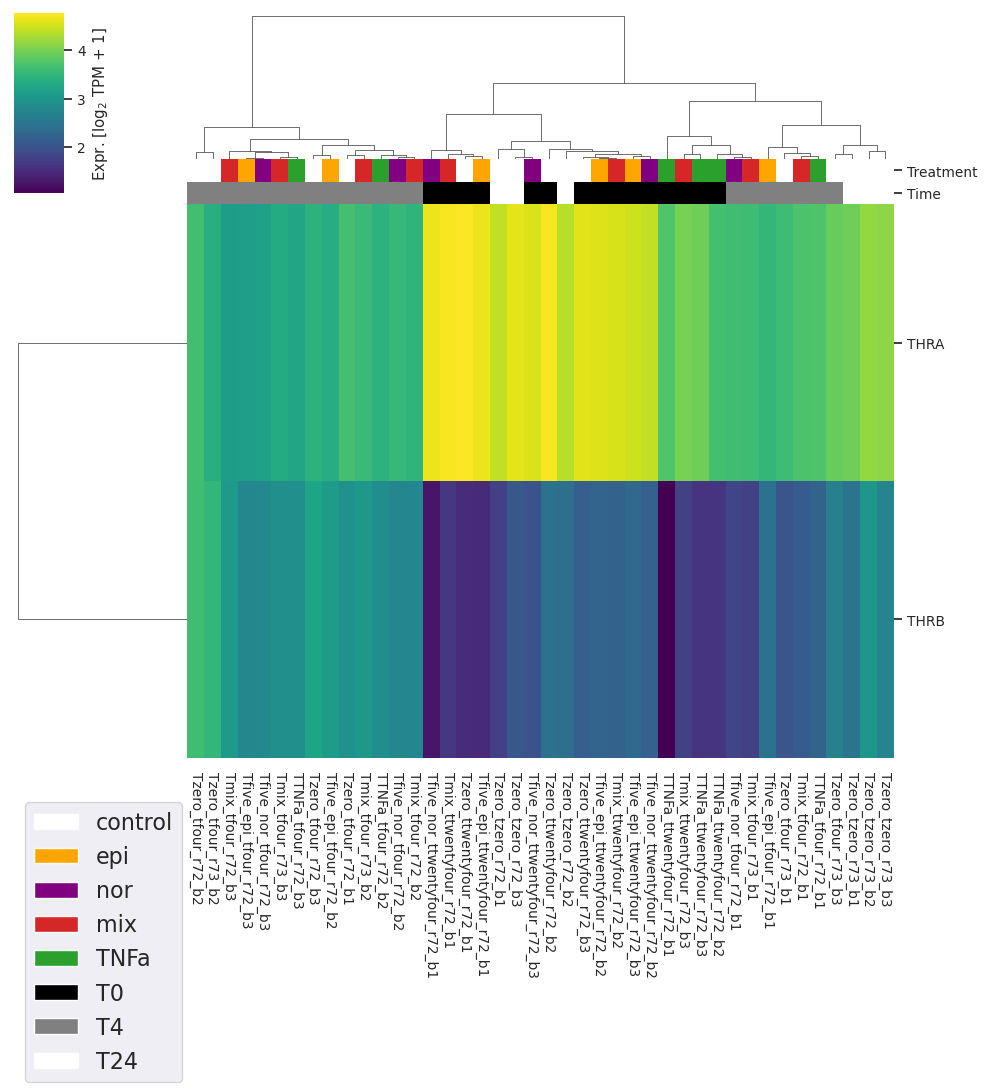

In [11]:
treatment_colors = []
for label in pdf.columns:
    if 'Tzero' in label:
        the_color = 'white'
    elif 'Tfive_epi' in label:
        the_color = 'orange'
    elif 'Tfive_nor' in label:
        the_color = 'purple'
    elif 'Tmix' in label:
        the_color = 'tab:red'
    elif 'TTNFa' in label:
        the_color = 'tab:green'
    else:
        print('error at treatment color assignment')
    treatment_colors.append(the_color)
    
time_colors = []
for label in pdf.columns:
    if 'tzero' in label:
        the_color = '1'
    elif 'tfour' in label:
        the_color = '0.5'
    elif 'ttwentyfour' in label:
        the_color = '0'
    else:
        print('error at time color assignment')
    time_colors.append(the_color)
    
color_df = pandas.DataFrame({'Treatment':treatment_colors, 'Time':time_colors}, index=pdf.columns)

seaborn.set(font_scale=0.9)
g = seaborn.clustermap(pdf, row_cluster=True, col_cluster=True, cmap='viridis',
                       method='ward', metric='euclidean', xticklabels=1, col_colors=color_df,
                       cbar_kws={'label': 'Expr. [log$_2$ TPM + 1]'}
                      )

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.patches.Patch(facecolor='0', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='1', edgecolor='white')
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNFa', 'T0', 'T4', 'T24'], fontsize=16, loc=3, bbox_to_anchor=(0, -5))

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=-90)
matplotlib.pyplot.show()

In [12]:
zscore_all = scipy.stats.zscore(pdf, axis=1)

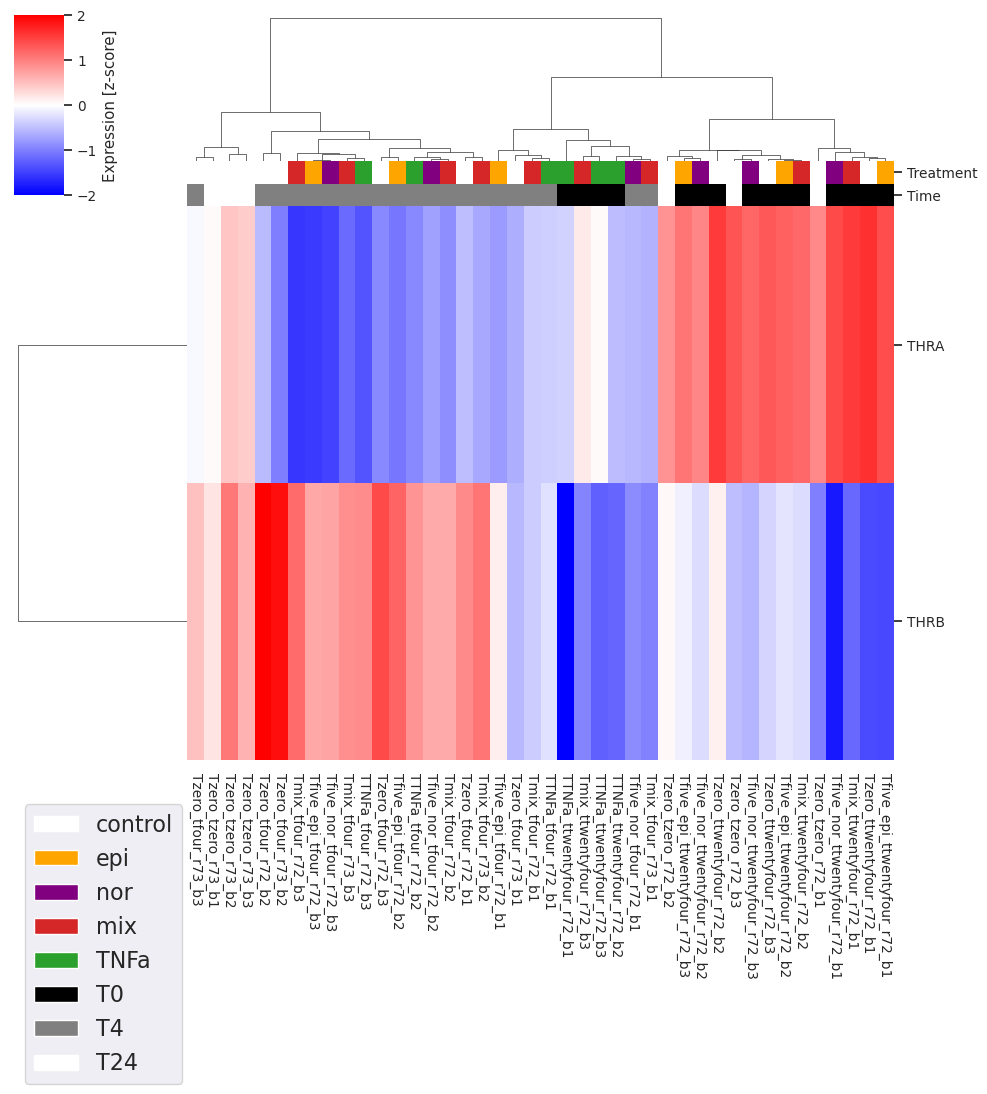

In [13]:
g = seaborn.clustermap(zscore_all, row_cluster=True, col_cluster=True, cmap='bwr', vmin=-2, vmax=2,
                       method='ward', metric='euclidean', xticklabels=1, col_colors=color_df,
                       cbar_kws={'label': 'Expression [z-score]'}
                      )

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.patches.Patch(facecolor='0', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='0.5', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='1', edgecolor='white')
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNFa', 'T0', 'T4', 'T24'], fontsize=16, loc=3, bbox_to_anchor=(0, -5))

g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=-90)
matplotlib.pyplot.show()